In [209]:
import numpy as np
import pandas as pd

In [210]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\AAPL (1).csv')

In [211]:
training_set = df.iloc[:,1:2].values
training_set.shape

(10349, 1)

In [212]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scale.fit_transform(training_set)
training_set_scaled.shape


(10349, 1)

In [213]:
x_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [214]:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [215]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
'''
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(25))

regressor.add(Dense(units=1))
'''

'\nregressor = Sequential()\nregressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))\nregressor.add(Dropout(0.2))\n\n\nregressor.add(LSTM(units=50,return_sequences=True))\nregressor.add(Dropout(0.2))\n\nregressor.add(LSTM(units=50,return_sequences=False))\nregressor.add(Dropout(0.2))\nregressor.add(Dense(25))\n\nregressor.add(Dense(units=1))\n'

In [216]:

regressor = Sequential()
regressor.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(LSTM(50,return_sequences = False))
regressor.add(Dense(10))
regressor.add(Dense(1))


In [217]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

In [218]:
regressor.fit(x_train,y_train,epochs=4,batch_size=64)

Epoch 1/4
161/161 [==============================] - 11s 45ms/step - loss: 9.9525e-04
Epoch 2/4
161/161 [==============================] - 10s 62ms/step - loss: 5.9826e-05
Epoch 3/4
161/161 [==============================] - 10s 65ms/step - loss: 6.7324e-05
Epoch 4/4
161/161 [==============================] - 10s 64ms/step - loss: 6.2694e-05


In [219]:
test_data = pd.read_csv(r'C:\Users\Admin\Downloads\Apple_test.csv')

In [220]:
len(input_data)
len(real_price)

60

In [221]:
real_price = test_data.iloc[:,1:2].values
input_data=pd.concat((df['Open'],test_data['Open']),axis=0)

inputs = input_data[len(input_data)-len(real_price)-60:].values
inputs = inputs.reshape(-1,1)
inputs.shape

(120, 1)

In [222]:

inputs = scale.transform(inputs)
x = []
y1 = []
for i in range(60,len(inputs)):
    x.append(inputs[i-60:i,0])


x = np.array(x)
print(x.shape)

x = np.reshape(x,(x.shape[0],x.shape[1],1))
x.shape



(60, 60)


(60, 60, 1)

In [223]:
predict_value = regressor.predict(x)
predict_value.shape
predict_value = scale.inverse_transform(predict_value)
predict_value
rmse = np.sqrt(np.mean(predict_value-real_price)**2)
rmse

2/2 [==============================] - 1s 14ms/step


3.514244394026694

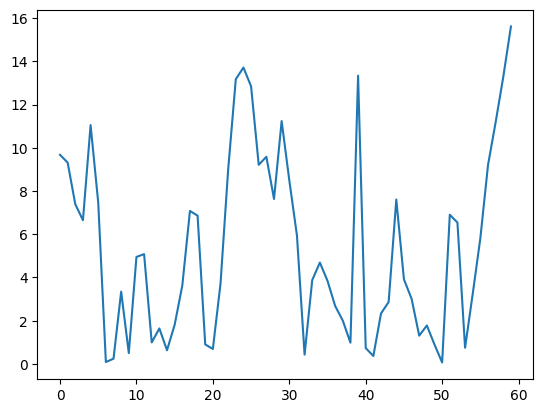

In [225]:
error = abs(real_price-predict_value)
plt.plot(error)


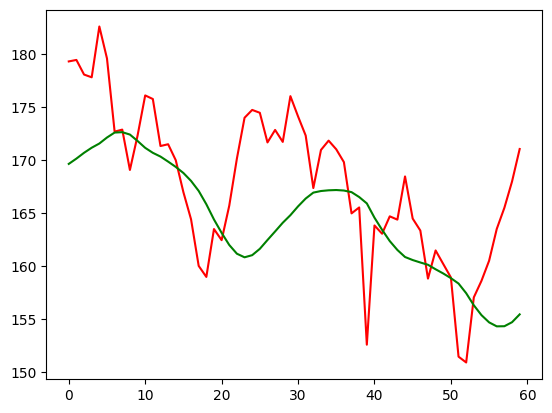

In [224]:
import matplotlib.pyplot as plt
plt.plot(real_price,color = 'red')
plt.plot(predict_value,color = 'green')
plt.show()